In [8]:
import os
import glob
import warnings
import shutil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization

warnings.filterwarnings("ignore")

In [2]:
# Set default random number

import random
from numpy.random import seed
#from tensorflow import set_random_seed

seed(1)
random.seed(1)
#set_random_seed(1)
#tensorflow.random.set_seed(1)

In [3]:
!nvidia-smi

Mon Feb 10 13:47:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [9]:
# Define the original directories and their corresponding class names
original_dirs = {
    'Calculus': '/kaggle/input/sharp-dataset/Sharp Dataset/Calculus',
    'Caries': '/kaggle/input/sharp-dataset/Sharp Dataset/Caries',
    'Gingivitis': '/kaggle/input/sharp-dataset/Sharp Dataset/Gingivitis',
    'Mouth ulcer': '/kaggle/input/sharp-dataset/Sharp Dataset/Mouth Ulcer',
    'Tooth Discoloration': '/kaggle/input/sharp-dataset/Sharp Dataset/Tooth Discoloration',
    'Hypodontia': '/kaggle/input/sharp-dataset/Sharp Dataset/Hypodontia'
}

# Define the target base directory
base_dir = '/kaggle/working/Dataset'

# Define the target structure
splits = ['train', 'val', 'test']
classes = list(original_dirs.keys())

# Create target directories
for split in splits:
    for class_name in classes:
        os.makedirs(os.path.join(base_dir, split, class_name), exist_ok=True)

# Initialize dictionaries to hold the counts for train, val, and test sets
class_split_counts = {class_name: {'train': 0, 'val': 0, 'test': 0} for class_name in classes}

# Function to copy images to the target directory and count them
def copy_and_count_images(class_name, image_paths):
    # Split the data
    train_paths, test_paths = train_test_split(image_paths, test_size=0.1, random_state=42)
    train_paths, val_paths = train_test_split(train_paths, test_size=0.2, random_state=42)  # 0.2 * 0.9 = 0.18

    # Define split mappings
    split_paths = {
        'train': train_paths,
        'val': val_paths,
        'test': test_paths
    }

    # Copy images to their respective directories and count them
    for split, paths in split_paths.items():
        class_split_counts[class_name][split] = len(paths)
        for img_path in paths:
            target_path = os.path.join(base_dir, split, class_name, os.path.basename(img_path))
            shutil.copy(img_path, target_path)

# Traverse the original directories and gather image paths
for class_name, original_dir in original_dirs.items():
    image_paths = []
    for root, dirs, files in os.walk(original_dir):
        image_paths.extend([os.path.join(root, file) for file in files if file.endswith(('.jpg', '.jpeg', '.png'))])
    if image_paths:
        copy_and_count_images(class_name, image_paths)

print("Images have been copied and organized successfully.")

Images have been copied and organized successfully.


In [10]:
#Loading dataset Normal vs Pneumonia baru - For Journal Publishing

train_dir = '/kaggle/working/Dataset/train'
val_dir = '/kaggle/working/Dataset/val'
test_dir = '/kaggle/working/Dataset/test'

In [11]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count = 0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count += len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [12]:
train_samples = get_files(train_dir)
val_samples = get_files(val_dir)
test_samples = get_files(test_dir)
num_classes = len(glob.glob(train_dir+"/*"))

print(num_classes, "Jenis Diagnosis")
print(train_samples, "Citra X-Ray data Training")
print(val_samples, "Citra X-Ray data Validation")
print(test_samples, "Citra X-Ray data Testing")

6 Jenis Diagnosis
7995 Citra X-Ray data Training
2004 Citra X-Ray data Validation
1115 Citra X-Ray data Testing


In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Randomly rotate the images by 20 degrees
    width_shift_range=0.2,  # Randomly shift the width of the images by 20%
    height_shift_range=0.2,  # Randomly shift the height of the images by 20%
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'  # Fill any newly created pixels after rotation or shifting
)


test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Randomly rotate the images by 20 degrees
    width_shift_range=0.2,  # Randomly shift the width of the images by 20%
    height_shift_range=0.2,  # Randomly shift the height of the images by 20%
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'  # Fill any newly created pixels after rotation or shifting
)


In [14]:
img_width,img_height = 256, 256
input_shape = (img_width, img_height,3)
batch_size = 32

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width,img_height),
                                                    batch_size=batch_size,
                                                    color_mode='rgb')

validation_generator = train_datagen.flow_from_directory(val_dir, #dalam direktori yang sama dengan data training
                                                         target_size = (img_height, img_width),
                                                         batch_size = batch_size,
                                                         color_mode='rgb')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size,
                                                  color_mode='rgb')

Found 7995 images belonging to 6 classes.
Found 2004 images belonging to 6 classes.
Found 1115 images belonging to 6 classes.


In [15]:
# Label pada masing-masing kelas
train_generator.class_indices

{'Calculus': 0,
 'Caries': 1,
 'Gingivitis': 2,
 'Hypodontia': 3,
 'Mouth ulcer': 4,
 'Tooth Discoloration': 5}

In [16]:
model = Sequential()
model.add(Conv2D(8, (7,7), padding='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(8, (7,7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16, (5,5), padding='same', activation='relu'))
model.add(Conv2D(16, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 8)         │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 8)         │           3,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 16)        │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 16)        │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,189,198 (8.35 MB)

 Trainable params: 2,189,198 (8.35 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model = Sequential()
model.add(Conv2D(8, (7,7), padding='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(8, (7,7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16, (5,5), padding='same', activation='relu'))
model.add(Conv2D(16, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 256, 256, 8)         │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 256, 256, 8)         │           3,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 128, 128, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 16)        │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 128, 128, 16)        │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,189,198 (8.35 MB)

 Trainable params: 2,189,198 (8.35 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add custom fully connected layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Replace `num_classes` with the number of classes in your dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,3

 Total params: 14,887,558 (56.79 MB)

 Trainable params: 172,870 (675.27 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [22]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

train = model.fit(train_generator,
                            epochs=100,
                            steps_per_epoch=train_generator.samples // batch_size,
                            validation_data = validation_generator,
                            validation_steps = validation_generator.samples // batch_size, 
                            verbose=1)

Epoch 1/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 174s 609ms/step - accuracy: 0.3874 - loss: 1.4010 - val_accuracy: 0.5403 - val_loss: 1.0821
Epoch 2/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.5625 - loss: 0.9603 - val_accuracy: 0.4500 - val_loss: 0.9322
Epoch 3/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 136s 536ms/step - accuracy: 0.5724 - loss: 1.0415 - val_accuracy: 0.6174 - val_loss: 0.9465
Epoch 4/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.6562 - loss: 0.8356 - val_accuracy: 0.4000 - val_loss: 1.2970
Epoch 5/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 134s 527ms/step - accuracy: 0.6009 - loss: 0.9537 - val_accuracy: 0.6260 - val_loss: 0.9054
Epoch 6/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.7500 - loss: 0.6915 - val_accuracy: 0.6500 - val_loss: 0.9580
Epoch 7/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 134s 527ms/step - accuracy: 0.6326 - loss: 0.9050 - val_accuracy: 0.6568 - val_loss: 0.8482
Epoch 8/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.6562 -

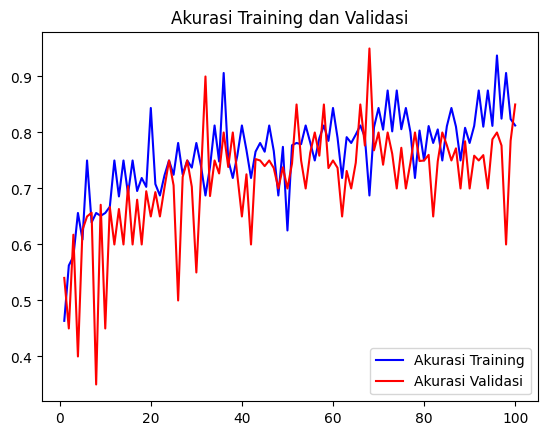

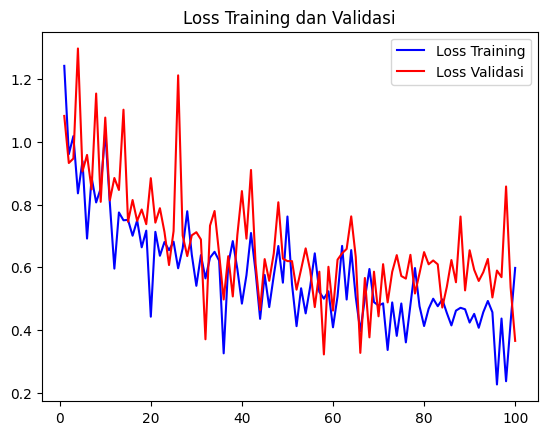

In [23]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']

epochs = range(1, len(acc) + 1)

# Akurasi data Training dan Validasi
plt.plot(epochs, acc, 'b', label='Akurasi Training')
plt.plot(epochs, val_acc, 'r', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend()

plt.figure()
# Loss Training dan Validasi
plt.plot(epochs, loss, 'b', label='Loss Training')
plt.plot(epochs, val_loss, 'r', label='Loss Validasi')
plt.title('Loss Training dan Validasi')
plt.legend()
plt.show()

In [24]:
loss, accuracy = model.evaluate(validation_generator, verbose=1)
print("loss Testing adalah {}".format(loss))
print("Akurasi Testing adalah {}".format(accuracy))

63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 440ms/step - accuracy: 0.7650 - loss: 0.5409
loss Testing adalah 0.5311539769172668
Akurasi Testing adalah 0.7744510769844055


In [25]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size,
                                                  color_mode='rgb',
                                                  shuffle=False)

#resolt = model.predict_classes(test_generator, batch_size=None, verbose=1)

# Assuming you have already defined your model as 'model'

# Get the predicted probabilities for each class
predictions = model.predict(test_generator, batch_size=None, verbose=1)

# Convert predicted probabilities to class labels
predicted_labels = predictions.argmax(axis=1)

# Print the predicted labels
print(predicted_labels)

Found 1115 images belonging to 6 classes.
35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 429ms/step
[0 2 2 ... 1 4 1]


In [26]:
from sklearn import metrics
print(metrics.accuracy_score(test_generator.classes, predicted_labels))

0.7946188340807175


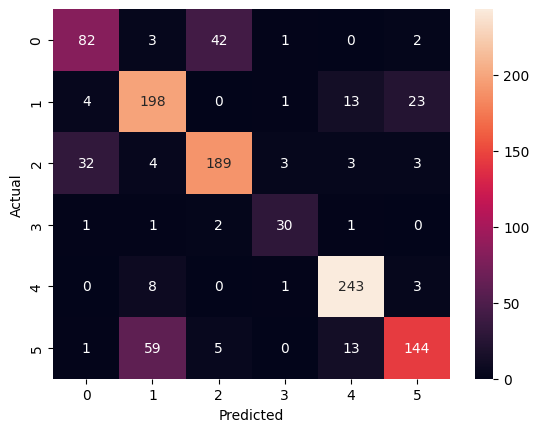

In [27]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


data = {'y_Actual':    test_generator.classes,
        'y_Predicted': predicted_labels
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='.0f')
plt.show()

In [29]:
# Menyimpan model yan telah dibangun, meliputi : optimizer, architecture, weights dan konfigurasi training
from keras.models import load_model
model.save('/kaggle/working/dental_v1_vgg16.h5')

# Menyimpan bobot dari model
from keras.models import load_model
model.save_weights('/kaggle/working/dental_v1_vgg16.weights.h5')

# klasifikasi dari model
classes = train_generator.class_indices
classes

{'Calculus': 0,
 'Caries': 1,
 'Gingivitis': 2,
 'Hypodontia': 3,
 'Mouth ulcer': 4,
 'Tooth Discoloration': 5}

In [43]:
# Classification Dental Image RGB Camera

import numpy as np
from keras.models import load_model
import tensorflow as tf
from PIL import Image

def classify_image(image_path):
    # Load the model
    model = '/kaggle/working/dental_v1_vgg16.h5'
    model = tf.keras.models.load_model(model)

    # Load and preprocess the image
    img = Image.open(image_path)
    img = img.resize((256, 256))  # Resize the image to match the input size of the model
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    # Make predictions
    predictions = model.predict(img)

    # Get the predicted class labels
    class_labels = ['Calculus',
                    'Caries',
                    'Gingivitis',
                    'Hypodontia',
                    'Mouth ulcer',
                    'Tooth Discoloration']

    # Print the predicted class probabilities
    for i, prob in enumerate(predictions[0]):
        label = class_labels[i]
        print(f"{label}: {prob * 100}%")

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label


image_path = '/kaggle/input/sharp-dataset/Sharp Dataset/Tooth Discoloration/Tooth_Discoloration_0_1026.jpeg'

predicted_class = classify_image(image_path)
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
Calculus: 0.0019948958652094007%
Caries: 2.1350203081965446%
Gingivitis: 0.004255319072399288%
Hypodontia: 0.000850795186124742%
Mouth ulcer: 13.832597434520721%
Tooth Discoloration: 84.02527570724487%
Predicted class: Tooth Discoloration
